In [ ]:
veczr = CountVectorizer(tokenizer=tokenize)

In [ ]:
trn_term_doc = veczr.fit_transform(trn)
val_term_doc = veczr.transform(val)

$$P(c=1|d) = \frac{P(d|c=1)* P(c=1)}{P(d)}$$

We can divide the above equation by P(c=0|d) and then compare if the equation is greater than 1 or less than 1.

$$\frac{p(d|c_1)\cdot p(c_1)}{p(d|c_0)\cdot p(c_0)}$$

One problem of Naive Bayes is it assumes that all words are independent so we can multiply them together regardless of their dependency.

We define the **log-count ratio** *r* for each work $\textit{f}$:
$$r = \text{log}\frac{\text{ratio of feature $f$ in positive documents}}{\text{ratio of feature $f$ in negative documents}}$$

In [4]:
from IPython.display import Image
%matplotlib inline

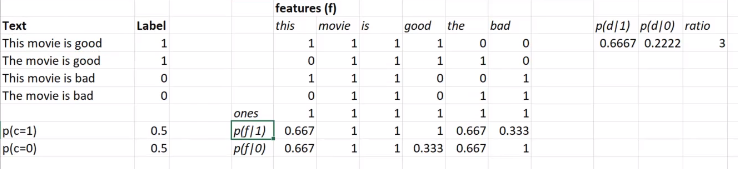

In [3]:
Image("pic/naivebayes1.png")

In [ ]:
x=trn_term_doc
y=trn_y

p = x[y==1].sum(0)+1
q = x[y==0].sum(0)+1
r = np.log((p/p.sum())/(q/q.sum())) #ratio
b = np.log(len(p)/len(q))

Here is the formula for Naive Bayes.

In [ ]:
pre_preds = val_term_doc @ r.T + b
preds = pred_preds.T > 0
(preds==val_y).mean()

... and binarized Naive Bayes (this method does not count how many the word appear. What matters is whether it appears)

In [ ]:
pre_preds = val_term_doc.sign() @ r.T + b
preds = pre_preds.T > 0
(preds==val_y).mean()

## Logistic regression

Instead of using r (ratio), why don't we learn them.  
Here is how we fit logistic regression where the features are unigrams.

In [ ]:
m = LogisticRegression(C=1e8, dual=True) # when the matrix is much wider than it is tall, we should use dual=True
m.fit(x,y)
preds = m.predict(val_term_doc)
(preds=val_y).mean()

Since we have so many parameters but with much fewer observations, we should use regularization terms

You can't use dual=True unless you have L2 term. That's why Jemery used L2 here. He mentioned that in Machine Learning we might not care use L1 or L2. We juse the one that performs better in validation set.

In [ ]:
m = LogisticRegression(C=0.1, dual=True) # when the matrix is much wider than it is tall, we should use dual=True
m.fit(x,y)
preds = m.predict(val_term_doc)
(preds=val_y).mean()

## Trigram with NB features

In [ ]:
veczr = CountVectorizer(ngram_range=(1,3), tokenizer=tokenize, max_feature=80000) 
# If you set max_feature, the CountVectorizer will sort the vocabulary by how often everything appears
# whether it be unigram or bigram or trigram. And it will cut off after the 80000 most common. 
trn_term_doc = veczr.fit_transform(trn)
val_term_doc = veczr.transform(val)